### Simulación Simbólica 

In [1]:
import sympy as sp
from sympy.abc import s

In [2]:
from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle

In [4]:
Q_bp, a, b, k = sp.symbols("Q_bp, a, b, k", complex = False) 

H1 = k * a/(s + a)

# nucleo de transformación pasabanda
Kbp = Q_bp * (s**2 + 1) / s


# Análisis de la transformación pasabanda para una transferencia de primer orden.
H1bp = sp.simplify(sp.expand(H1.subs(s, Kbp)))
num, den = sp.fraction(H1bp)
num = sp.Poly(num,s)
den = sp.Poly(den,s)
num1_bp, den1_bp, w1_on, Q1_n, w1_od, Q1_d, K1_bp  = parametrize_sos(num, den)

print_subtitle('Primer orden')

print_latex('$ T(s) = ' + sp.latex(H1) + '$')
print_latex('$ T(s) |_{s = ' + sp.latex(Kbp) +  ' } = ' + sp.latex(K1_bp) + ' \\frac{ ' + sp.latex(num1_bp.as_expr()) + '}{' + sp.latex(den1_bp.as_expr()) + '} $')

#### Primer orden

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Simulación Numérica 

In [5]:
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

In [6]:
# coeficientes de la transferencia de primer orden T1
T1_num = np.array([1])
T1_den = np.array([1, 1])

# Q de la transformación
Q_bp = 5

# núcleo LP-BP
num_pbanda, den_pbanda = sig.lp2bp(T1_num, T1_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda segundo orden normalizado Q = 5' ))

print_subtitle('Como lo muestra SciPy')

print(num_pbanda)
print(den_pbanda)

print_subtitle('Como cociente de polinomios')

# forma un poco más clara
pretty_print_lti(num_pbanda, den_pbanda)

print_subtitle('Factorizado con $\omega_0$ y $Q$')

# esta es la que va
pretty_print_bicuad_omegayq(num_pbanda, den_pbanda)

### Filtro pasabanda segundo orden normalizado Q = 5

#### Como lo muestra SciPy

[0.2 0. ]
[1.  0.2 1. ]


#### Como cociente de polinomios

<IPython.core.display.Math object>

#### Factorizado con $\omega_0$ y $Q$

<IPython.core.display.Math object>

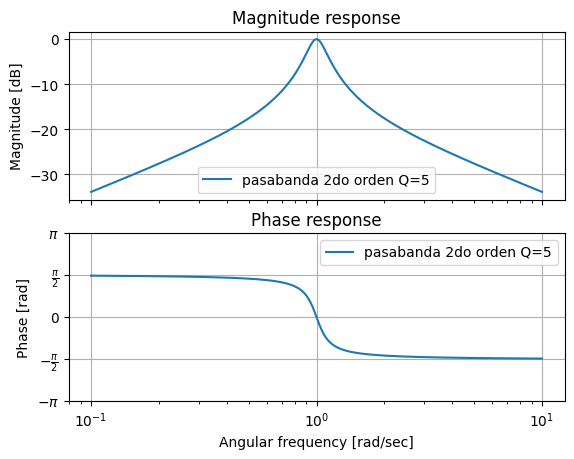

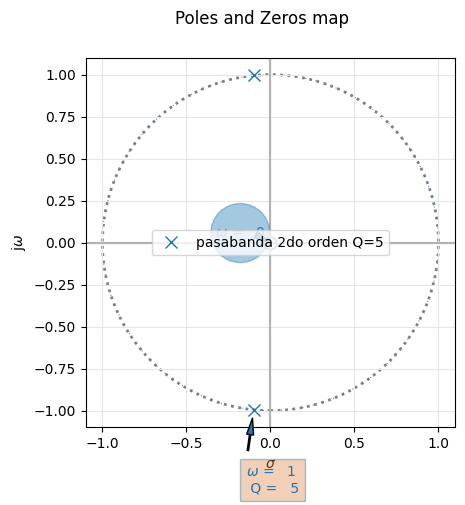

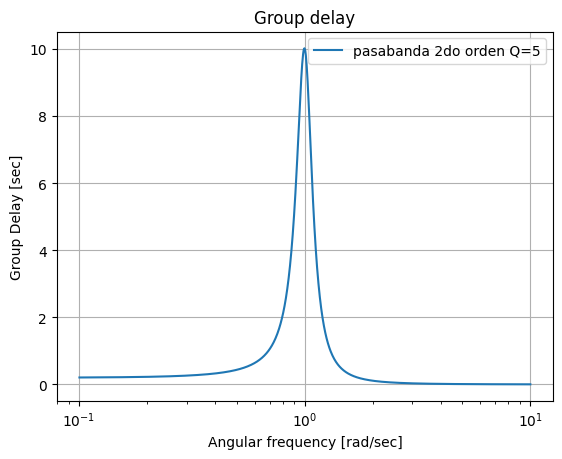

In [7]:
T1_bp =  sig.TransferFunction( num_pbanda, den_pbanda )

analyze_sys(T1_bp, sys_name='pasabanda 2do orden Q={:d}'.format(Q_bp))